In [18]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import train_test_split;
from torch.utils.data import TensorDataset , DataLoader
print("Libs imported")

Libs imported


In [11]:
df = pd.read_csv("students.csv")
print("dataset Loaded sucessfully")

dataset Loaded sucessfully


In [ ]:
df.head()
df.tail()
df.shape
df.info()
df.describe()
df.isna().sum()
df.corr()

In [13]:
X = df[["Hours_Studied","Sleep_Hours","Attendance"]]
y = df["Score"]

In [14]:
X_train ,X_test , y_train , y_test = train_test_split(
    X,y, test_size=0.2,random_state=42
)

In [15]:
X_train.shape , X_test.shape

((8, 3), (2, 3))

In [16]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [17]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [20]:
train_ds = TensorDataset(X_train_tensor,y_train_tensor)
test_ds = TensorDataset(X_test_tensor,y_test_tensor)

train_loader = DataLoader(train_ds, batch_size=4, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=4)

In [21]:
model = nn.Sequential(
    nn.Linear(3,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

In [22]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

In [27]:
epochs = 500
for epoch in range(epochs):
    model.train()
    
    for X_batch,y_batch in train_loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred,y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss = {loss.item():.4f}")

Epoch 0: Train Loss = 7185.9629
Epoch 50: Train Loss = 34.4187
Epoch 100: Train Loss = 4.2494
Epoch 150: Train Loss = 0.8163
Epoch 200: Train Loss = 1.9599
Epoch 250: Train Loss = 0.9721
Epoch 300: Train Loss = 1.5965
Epoch 350: Train Loss = 1.1155
Epoch 400: Train Loss = 0.4215
Epoch 450: Train Loss = 1.0309


In [31]:
model.eval()
test_loss = 0

with torch.inference_mode():
    for X_batch , y_batch in test_loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred , y_batch)
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f"\nTest Loss: {test_loss:.4f}")


Test Loss: 8.5307


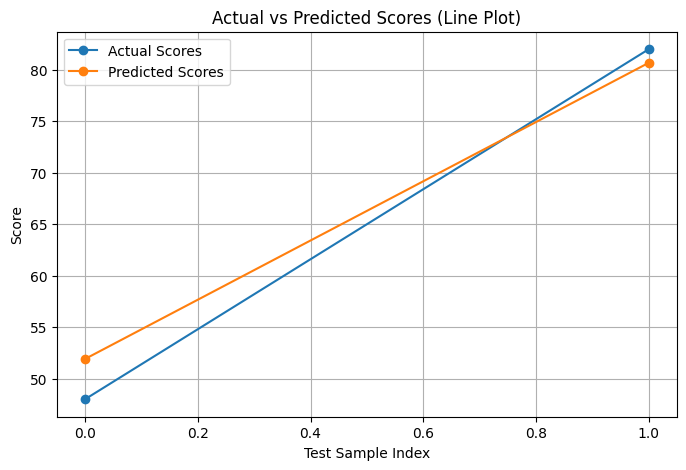

In [36]:
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)

actual = y_test_tensor.numpy()
pred = y_test_pred.numpy()

plt.figure(figsize=(8,5))
plt.plot(actual, label="Actual Scores", marker='o')
plt.plot(pred, label="Predicted Scores", marker='o')
plt.xlabel("Test Sample Index")
plt.ylabel("Score")
plt.title("Actual vs Predicted Scores (Line Plot)")
plt.grid()
plt.legend()
plt.show()

In [37]:
torch.save(model.state_dict(),"student_model.pth")
print("model saved")

model saved
